### Data Science Game 2017

Data fields

    media_id - identifiant of the song listened by the user
    album_id - identifiant of the album of the song
    media_duration - duration of the song
    user_gender -  gender of the user
    user_id -  anonymized id of the user
    context_type - type of content where the song was listened: playlist, album ...
    release_date - release date of the song with the format YYYYMMDD
    ts_listen - timestamp of the listening in UNIX time
    platform_name - type of os
    platform_family - type of device
    user_age - age of the user
    listen_type - if the songs was listened in a flow or not
    artist_id - identifiant of the artist of the song
    genre_id - identifiant of the genre of the song
    is_listened - 1 if the track was listened, 0 otherwise


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("../data/train_data4.csv")
df_test = pd.read_csv("../data/test_data4.csv")

df_train["user_id_id"] = df_train["user_id"]
df_test["user_id_id"] = df_test["user_id"]

In [3]:
len(df_train)

7558817

### Analisando quantidade de registro por usuário

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use(['dark_background'])
#plt.style.use('ggplot')
register_count = df_train["user_id"].value_counts()
register_count.describe()
# plt.show()

count    19918.000000
mean       379.496787
std        508.267045
min          1.000000
25%         66.000000
50%        197.000000
75%        495.000000
max       6317.000000
Name: user_id, dtype: float64

In [5]:
register_count[:5].index.values

array([0, 1, 2, 3, 4])

In [6]:
# df_train = df_train[df_train["user_id"].isin(register_count[:1].index.values)]

(array([  1.61650000e+04,   2.60900000e+03,   7.13000000e+02,
          2.60000000e+02,   9.50000000e+01,   3.80000000e+01,
          2.10000000e+01,   8.00000000e+00,   6.00000000e+00,
          3.00000000e+00]),
 array([  1.00000000e+00,   6.32600000e+02,   1.26420000e+03,
          1.89580000e+03,   2.52740000e+03,   3.15900000e+03,
          3.79060000e+03,   4.42220000e+03,   5.05380000e+03,
          5.68540000e+03,   6.31700000e+03]),
 <a list of 10 Patch objects>)

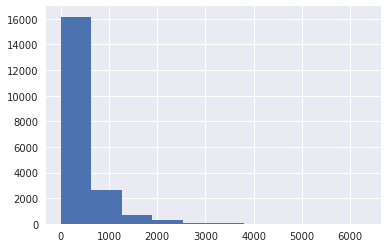

In [7]:
%matplotlib inline
plt.hist(df_train["user_id"].value_counts())

In [8]:
threshold = 30

user_for_general_model = register_count[(register_count <= threshold)].index
user_for_specific_model = register_count[(register_count > threshold)].index
print(len(user_for_general_model))
print(len(user_for_specific_model))

2630
17288


In [9]:
# ### select users for specific
# df_train = df_train[df_train["user_id"].isin(user_for_specific_model)]
# df_test = df_test[df_test["user_id"].isin(user_for_specific_model)]
# df_train.columns

In [10]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
df_train.drop(to_drop, axis = 1,inplace=True)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,artist_albuns,artist_fans,artist_radio,media_bpm,media_rank,user_id_id
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,0,2,16.580822,7,1.0,32.0,1.0,100.1,292784.0,9241
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01 00:00:00,2,1,3.0,0,...,2,2,19.241096,7,18.0,6204.0,1.0,160.2,317348.0,16547
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,0,2,26.646575,8,23.0,20022.0,1.0,90.1,309034.0,7665
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,0,2,13.915068,6,56.0,442765.0,1.0,124.9,291331.0,1580
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,1,1,15.271233,7,65.0,28423.0,1.0,120.0,406872.0,1812


In [11]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)
#pd.set_option("precision", 2)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,artist_albuns,artist_fans,artist_radio,media_bpm,media_rank,user_id_id
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,0,2,16.580822,7,1.0,32.0,1.0,100.1,292784.0,9241
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01 00:00:00,2,1,3.0,0,...,2,2,19.241096,7,18.0,6204.0,1.0,160.2,317348.0,16547
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,0,2,26.646575,8,23.0,20022.0,1.0,90.1,309034.0,7665
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,0,2,13.915068,6,56.0,442765.0,1.0,124.9,291331.0,1580
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,1,1,15.271233,7,65.0,28423.0,1.0,120.0,406872.0,1812


In [12]:
# pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

In [13]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

In [14]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

### Append User Specific

In [15]:
df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]


#df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
df_user.fillna(0, inplace=True)

df_user["nmidia_PROP_diff"] = df_user['nmidia_with_flow_listened_PROP'] - df_user['nmidia_regular_listened_PROP']

df_user.columns.values

array(['user_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened',
       'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff'], dtype=object)

In [16]:
# x = pd.isnull(df_user).sum()
# x[x > 0]

In [17]:
df_train = pd.merge(df_train, df_user, on="user_id")
df_test = pd.merge(df_test, df_user, on="user_id")
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,media_bpm,media_rank,user_id_id,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow,nmidia_with_flow_listened_PROP,nmidia_regular_listened_PROP,nmidia_PROP_diff
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,100.1,292784.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
1,7,2016-12-01 10:48:50,4301418,400118,9,2009-10-16 00:00:00,1,0,7.0,0,...,102.0,884679.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
2,10,2016-11-30 11:48:22,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
3,10,2016-12-01 07:18:24,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
4,10,2016-11-29 09:42:52,983248,109347,1,2002-10-21 00:00:00,1,0,3.0,1,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242


### Check for NA
#### Ver depois sobre o user_age_group!

In [18]:
# x = pd.isnull(df_train).sum()
# x[x > 0]

In [19]:
# df_train.dropna(inplace=True)

In [20]:
# x = pd.isnull(df_train).sum()
# x[x > 0]
# del x

In [21]:
y = df_train["is_listened"].values

In [22]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

### Let's inspect the categorical variables!

In [23]:
for col in categorical_cols:
    print("{}: {}".format(col, len(df_train[col].unique())))

genre_id: 2922
media_id: 452965
album_id: 151464
context_type: 74
release_date: 8901
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 19918
artist_id: 67135
user_age: 13


### Strategy
1. Apply onehot to categorical with few classes
2. Rank categories to artist id
3. target encoder for context and genre
4. discard media, album, release date and user_id

In [24]:
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount

In [25]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family',
       'media_duration', 'listen_type', 'user_gender', 'user_id',
       'artist_id', 'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'ts_listen_DAY_OF_WEEK',
       'ts_listen_PERIOD_OF_DAY', 'user_age_group', 'diff_user_song_age',
       'media_decade', 'artist_albuns', 'artist_fans', 'artist_radio',
       'media_bpm', 'media_rank', 'user_id_id', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff'], dtype=object)

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [26]:
cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "album_id",
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
                   "user_age",
                   "artist_radio",
                   "user_age_group",
                   "media_decade",
                   "user_gender", 
                   "user_age_group", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id",
                "artist_fans"]


target = "is_listened"

In [27]:
te = TargetEncoder(cols_for_target_encoder, "is_listened")

In [28]:
te.fit(df_train)

In [29]:
te.transform(df_train)
te.transform(df_test)
del te

In [30]:
print("das")

das


In [31]:
print("teste")

teste


In [32]:
rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

In [33]:
# rc = RankCategorical(["media_decade"])
# rc.fit(df_train)
# rc.transform(df_train)
# rc.transform(df_test)
# del rc

In [34]:
# lc = RankCategorical(cols_for_count)
# lc.fit(df_train)
# lc.transform(df_train)
# lc.transform(df_test)

In [35]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,media_bpm,media_rank,user_id_id,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow,nmidia_with_flow_listened_PROP,nmidia_regular_listened_PROP,nmidia_PROP_diff
0,0.688147,2016-12-01 11:00:15,0.000000,0.000000,0.695604,2004-07-04 00:00:00,1,0,4.0,0.721113,...,100.1,292784.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
1,0.663153,2016-12-01 10:48:50,0.736878,0.701284,0.758048,2009-10-16 00:00:00,1,0,7.0,0.721113,...,102.0,884679.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
2,0.724500,2016-11-30 11:48:22,0.631609,0.709250,0.688531,2002-10-21 00:00:00,1,0,3.0,0.721113,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
3,0.724500,2016-12-01 07:18:24,0.631609,0.709250,0.688531,2002-10-21 00:00:00,1,0,3.0,0.721113,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
4,0.724500,2016-11-29 09:42:52,0.631609,0.709250,0.573605,2002-10-21 00:00:00,1,0,3.0,0.600282,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242


In [36]:
df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

In [37]:
print(df_train.head())

   genre_id            ts_listen  media_id  album_id  context_type         release_date  media_duration  listen_type   user_id  artist_id            ...              user_age_group_2  \
0  0.688147  2016-12-01 11:00:15  0.000000  0.000000      0.695604  2004-07-04 00:00:00             4.0     0.721113  0.676991      56514            ...                             1   
1  0.663153  2016-12-01 10:48:50  0.736878  0.701284      0.758048  2009-10-16 00:00:00             7.0     0.721113  0.676991        599            ...                             1   
2  0.724500  2016-11-30 11:48:22  0.631609  0.709250      0.688531  2002-10-21 00:00:00             3.0     0.721113  0.676991         66            ...                             1   
3  0.724500  2016-12-01 07:18:24  0.631609  0.709250      0.688531  2002-10-21 00:00:00             3.0     0.721113  0.676991         66            ...                             1   
4  0.724500  2016-11-29 09:42:52  0.631609  0.709250      0.573605  20

In [38]:
#df_train = rank_categorical(df_train, cols_for_rank)

In [39]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'media_duration', 'listen_type', 'user_id',
       'artist_id', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'diff_user_song_age',
       'artist_albuns', 'artist_fans', 'media_bpm', 'media_rank',
       'user_id_id', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff', 'platform_name_1', 'platform_name_2',
       'platform_family_1', 'platform_family_2', 'user_age_19',
       'user_age_20', 'user_age_21', 'user_age_22', 'user_age_23',
       'user_age_24', 'user_age_25', 'user_age_26', 'user_age_27',
       'user_age_28', 'user_age_29', 'user_age_30', 'user_age_

In [40]:
%timeit
### Drop
to_drop = ['ts_listen', 'release_date', "year", "text", 'release_date_DAY', 'release_date_MONTH']#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

In [41]:
# to_drop = ["year", "text"]
# df_train.drop(to_drop, axis = 1,inplace=True)

In [42]:
ignore_list = [target, "user_id_id"]
features = [col for col in df_train.columns.values if col not in ignore_list]
features

['genre_id',
 'media_id',
 'album_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'artist_id',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_YEAR',
 'diff_user_song_age',
 'artist_albuns',
 'artist_fans',
 'media_bpm',
 'media_rank',
 'nmidia_regular_listened',
 'nmidia_with_flow_listened',
 'nmidia_regular',
 'nmidia_with_flow',
 'nmidia_with_flow_listened_PROP',
 'nmidia_regular_listened_PROP',
 'nmidia_PROP_diff',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'user_age_19',
 'user_age_20',
 'user_age_21',
 'user_age_22',
 'user_age_23',
 'user_age_24',
 'user_age_25',
 'user_age_26',
 'user_age_27',
 'user_age_28',
 'user_age_29',
 'user_age_30',
 'user_age_group_1',
 'user_age_group_2',
 'media_decade_1',
 'media_decade_2',
 'media_decade_3',
 'media_decade_4',
 'media_decade_5',
 'media_decade_6',
 'media_decade_7',
 'media_decade_8',
 'us

In [43]:
pd.isnull(df_train).sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
import numpy as np
np.sum(np.isinf(df_train))

genre_id                             0
media_id                             0
album_id                             0
context_type                         0
media_duration                       0
listen_type                          0
user_id                              0
artist_id                            0
is_listened                          0
diff_ts_listen_AND_release_date_D    0
diff_ts_listen_AND_release_date_M    0
diff_ts_listen_AND_release_date_Y    0
release_date_YEAR                    0
diff_user_song_age                   0
artist_albuns                        0
artist_fans                          0
media_bpm                            0
media_rank                           0
user_id_id                           0
nmidia_regular_listened              0
nmidia_with_flow_listened            0
nmidia_regular                       0
nmidia_with_flow                     0
nmidia_with_flow_listened_PROP       0
nmidia_regular_listened_PROP         0
nmidia_PROP_diff         

In [45]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [46]:
print_full(pd.isnull(df_test).sum()[:])

Unnamed: 0                             0
Unnamed: 0.1                           0
sample_id                              0
genre_id                               0
media_id                               0
album_id                               0
context_type                           0
media_duration                         0
listen_type                            0
user_id                                0
artist_id                              0
diff_ts_listen_AND_release_date_D      0
diff_ts_listen_AND_release_date_M      0
diff_ts_listen_AND_release_date_Y      0
release_date_YEAR                      0
diff_user_song_age                     0
media_bpm                            337
media_rank                           337
artist_albuns                         61
artist_fans                            0
user_id_id                             0
nmidia_regular_listened                0
nmidia_with_flow_listened              0
nmidia_regular                         0
nmidia_with_flow

In [47]:
np.sum(np.isinf(df_test)).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
for column in features:
    try:
        df_test[column] = df_test[column].fillna(df_train[column].mean(skipna=True))
    except:
        df_test[column] = 0

#df_test = df_test.fillna(df_train.mean(skipna=True), axis=1)
df_test = df_test.applymap(lambda x : float(x))
pd.isnull(df_test).sum().sum()

0

In [49]:
np.sum(np.isinf(df_test)).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
# df_train.fillna(0, inplace=True)
# df_test.fillna(0, inplace=True)

In [51]:
# pd.isnull(df_train).sum()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


def complete_report(y_test, y_pred):
    print("*********************************")
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {0}".format(metrics.recall_score(y_test, y_pred)))
    print("F1-Score: {0}".format(metrics.f1_score(y_test, y_pred)))
    conf_m = confusion_matrix(y_test, y_pred)
    print(conf_m)
    try: 
        print("Roc Area: {0}".format(metrics.roc_auc_score(y_test, y_pred))) 
        roc_curve_label(y_test, y_pred)
    except:
        print("--")
    print("*********************************")
    
    return metrics.roc_auc_score(y_test, y_pred)
        
def roc_curve_label(y_test, y_pred):
    plt.figsize=(10,6)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RT + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [ ]:
from tqdm import tqdm
original_feats = features[:]
predictions = {}

100%|██████████| 17288/17288 [2:03:06<00:00,  2.35it/s] 


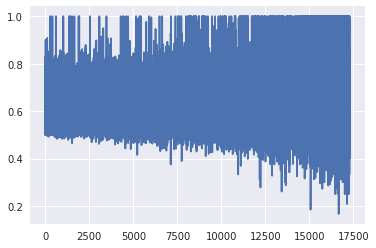

In [ ]:
rocs = []


for user in tqdm(user_for_specific_model):
    
    #features = original_feats[:]
    features = [col for col in df_train.columns.values if col not in ignore_list]
    df_train_ = df_train[df_train["user_id_id"] == user].copy(deep=True)
    #print(len(df_train_))
    
    X_train, X_test, y_train, y_test = train_test_split(df_train_[features], df_train_[target], test_size = 0.3)

    from sklearn import feature_selection
    all_features = features
    function_rule_selection = feature_selection.f_classif
    alpha_cutoff = 0.01

    selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
    selection_rule.fit(X_train, y_train);

    all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
    #print(all_pvalues)
    filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
    #print(filtered_pvalues)
    all_select_features = list(map(lambda x: x[1], filtered_pvalues))
    
    features = all_select_features
    
    if len(features) == 0:
        features = [col for col in df_train.columns.values if col not in ignore_list]
    
    X_train, X_test, y_train, y_test = train_test_split(df_train_[features], df_train_[target], test_size = 0.3)
    
    from sklearn.ensemble import RandomForestClassifier
    #print(len(X_train))
    model = RandomForestClassifier(n_jobs=-1)
    model.fit(X_train, y_train)  
    try:
        rocs.append(metrics.roc_auc_score(y_test, model.predict(X_test)))
    except:
        rocs.append(1)
    
    predictions[user] = model.predict_proba(df_test[df_test["user_id_id"] == user][features])
    
plt.plot(rocs)    

### salvar previsoes e rocs

In [58]:
d = pd.DataFrame.from_dict(predictions, orient="index")
d.to_csv("preds.csv")

In [59]:
d

,0
0,"[[0.013118132873, 0.986881867127]]"
1,"[[0.0, 1.0]]"
2,"[[0.0, 1.0]]"
3,"[[0.0, 1.0]]"
4,"[[0.9, 0.1]]"
5,"[[0.0, 1.0]]"
6,"[[0.0, 1.0]]"
7,"[[0.7, 0.3]]"
8,"[[0.0, 1.0]]"
9,"[[0.7, 0.3]]"


6317


/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [15 16 17 22 23 25 26 27 28 29 30 31 32 33 34 35 36 44 45 46 47 48] are constant.
  UserWarning)


*********************************
Accuracy: 0.98
Precision: 0.980142970612
Recall: 0.996768982229
F1-Score: 0.988386063276
[[   1   25]
 [   4 1234]]
Roc Area: 0.517615260345


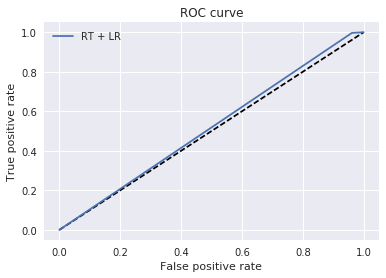

*********************************
12557


/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [22 23 25 26 27 30 31 32 33 34 35 36 45 46 47 48] are constant.
  UserWarning)


*********************************
Accuracy: 0.98
Precision: 0.983586869496
Recall: 0.994736842105
F1-Score: 0.989130434783
[[   1   41]
 [  13 2457]]
Roc Area: 0.509273182957


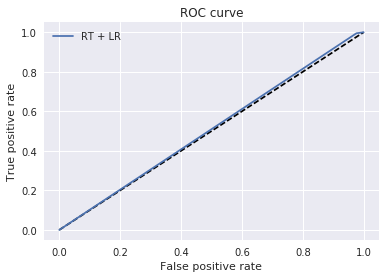

*********************************
18768


/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [22 23 26 27 30 31 32 33 34 45 46] are constant.
  UserWarning)


*********************************
Accuracy: 0.98
Precision: 0.982262832572
Recall: 0.993476488176
F1-Score: 0.987837837838
[[   9   66]
 [  24 3655]]
Roc Area: 0.556738244088


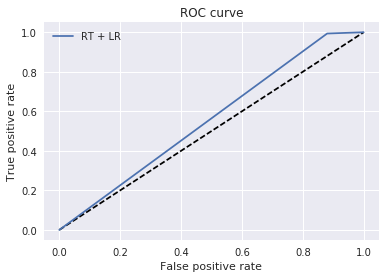

*********************************
24349


/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [22 23 27 30 31 32 33 34 45 46] are constant.
  UserWarning)


*********************************
Accuracy: 0.97
Precision: 0.981791544579
Recall: 0.992594159966
F1-Score: 0.987163299663
[[  57   87]
 [  35 4691]]
Roc Area: 0.69421374665


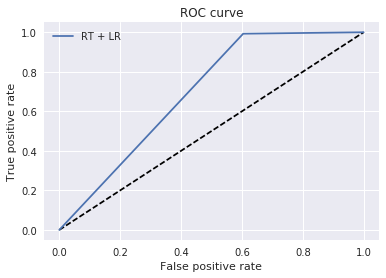

*********************************
29775
*********************************
Accuracy: 0.95
Precision: 0.9700059988
Recall: 0.968843618933
F1-Score: 0.969424460432
[[ 798  150]
 [ 156 4851]]
Roc Area: 0.905307885416


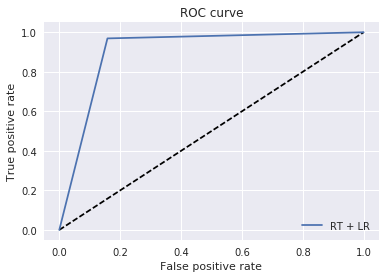

*********************************
35175


/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [27 30 32 33 34 45 46] are constant.
  UserWarning)


*********************************
Accuracy: 0.95
Precision: 0.972414932276
Recall: 0.971772862331
F1-Score: 0.972093791281
[[ 810  167]
 [ 171 5887]]
Roc Area: 0.900420719804


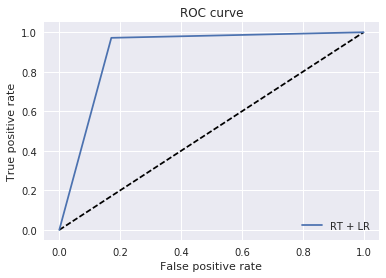

*********************************
40573


/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [27 32 33 34 45 46] are constant.
  UserWarning)


*********************************
Accuracy: 0.96
Precision: 0.979087719298
Recall: 0.977852537146
F1-Score: 0.978469738411
[[ 832  149]
 [ 158 6976]]
Roc Area: 0.912983353181


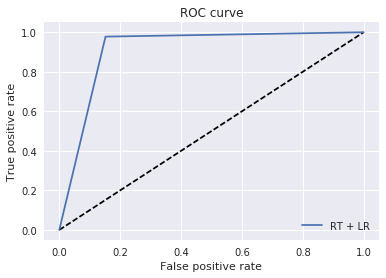

*********************************
45810


/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [32] are constant.
  UserWarning)


*********************************
Accuracy: 0.94
Precision: 0.966150870406
Recall: 0.960049423394
F1-Score: 0.963090483404
[[1633  245]
 [ 291 6993]]
Roc Area: 0.914795744711


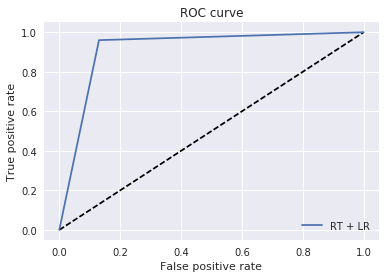

*********************************
50995
*********************************
Accuracy: 0.94
Precision: 0.966614058516
Recall: 0.960434258142
F1-Score: 0.96351424941
[[1634  275]
 [ 328 7962]]
Roc Area: 0.908189889679


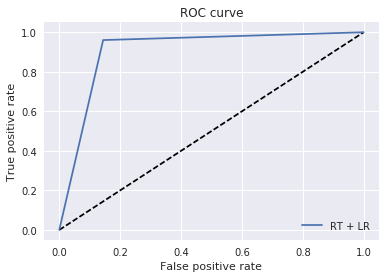

*********************************
55984
*********************************
Accuracy: 0.94
Precision: 0.965852580396
Recall: 0.962131219727
F1-Score: 0.963988308609
[[1804  309]
 [ 344 8740]]
Roc Area: 0.907946821411


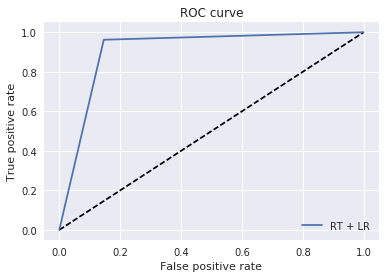

*********************************
60941
*********************************
Accuracy: 0.92
Precision: 0.952559034085
Recall: 0.938618656559
F1-Score: 0.945537466193
[[2247  444]
 [ 583 8915]]
Roc Area: 0.886812115348


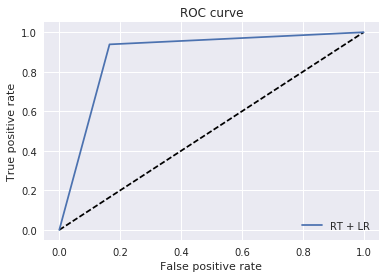

*********************************
65655
*********************************
Accuracy: 0.90
Precision: 0.945001550708
Recall: 0.923426608748
F1-Score: 0.934089515635
[[2700  532]
 [ 758 9141]]
Roc Area: 0.879411324176


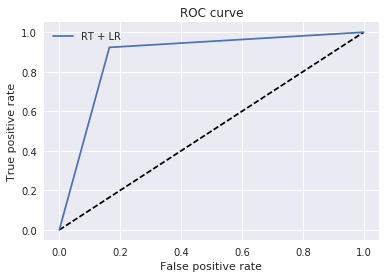

*********************************
70280
*********************************
Accuracy: 0.91
Precision: 0.94985471928
Recall: 0.93400921659
F1-Score: 0.941865328315
[[ 2671   535]
 [  716 10134]]
Roc Area: 0.883567303242


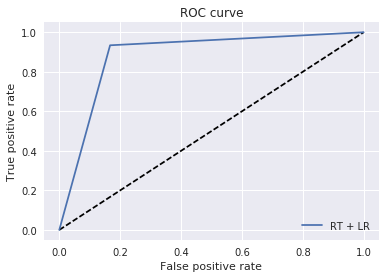

*********************************
74843
*********************************
Accuracy: 0.91
Precision: 0.948244473342
Recall: 0.938159361866
F1-Score: 0.943174959041
[[ 2713   597]
 [  721 10938]]
Roc Area: 0.878898412051


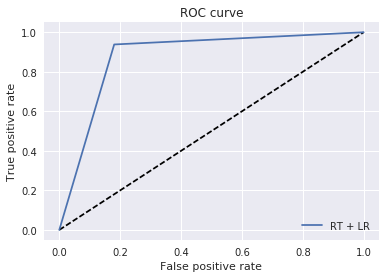

*********************************
79386
*********************************
Accuracy: 0.92
Precision: 0.955627009646
Recall: 0.939020537125
F1-Score: 0.947250996016
[[ 2666   552]
 [  772 11888]]
Roc Area: 0.883742711073


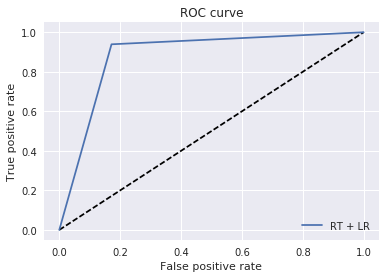

*********************************
83829
*********************************
Accuracy: 0.92
Precision: 0.960497713815
Recall: 0.944149720012
F1-Score: 0.95225355776
[[ 2667   527]
 [  758 12814]]
Roc Area: 0.889576425441


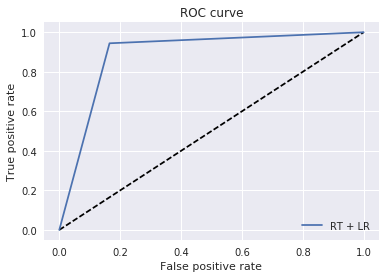

*********************************
88264
*********************************
Accuracy: 0.91
Precision: 0.947667224689
Recall: 0.93507612755
F1-Score: 0.941329573799
[[ 3010   719]
 [  904 13020]]
Roc Area: 0.871131520466


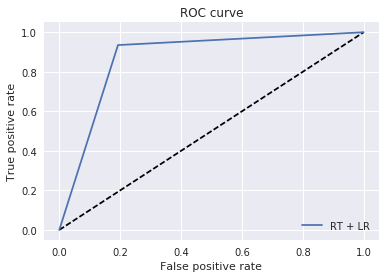

*********************************
92684
*********************************
Accuracy: 0.91
Precision: 0.950164293538
Recall: 0.93993363581
F1-Score: 0.945021276596
[[ 3042   728]
 [  887 13880]]
Roc Area: 0.873415093767


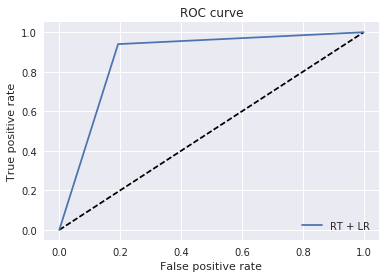

*********************************
96932
*********************************
Accuracy: 0.91
Precision: 0.948061546731
Recall: 0.931783662418
F1-Score: 0.939852128156
[[ 3471   773]
 [ 1033 14110]]
Roc Area: 0.874822085686


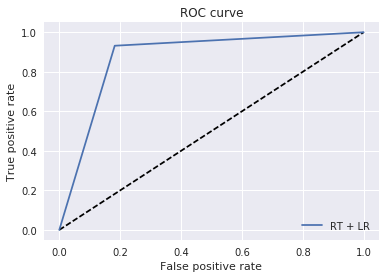

*********************************
101165
*********************************
Accuracy: 0.90
Precision: 0.945294004735
Recall: 0.93146712061
F1-Score: 0.938329628453
[[ 3517   855]
 [ 1087 14774]]
Roc Area: 0.867952224532


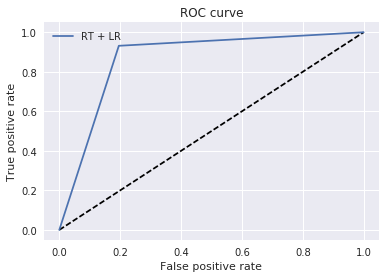

*********************************
105341
*********************************
Accuracy: 0.91
Precision: 0.948201087288
Recall: 0.932368310409
F1-Score: 0.940218049667
[[ 3572   848]
 [ 1126 15523]]
Roc Area: 0.870256553395


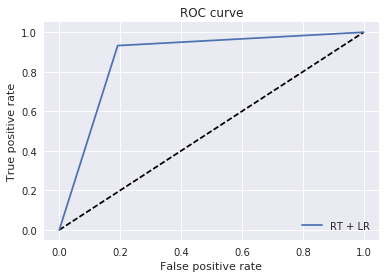

*********************************
109511
*********************************
Accuracy: 0.91
Precision: 0.947782794952
Recall: 0.935008566533
F1-Score: 0.941352345906
[[ 3491   902]
 [ 1138 16372]]
Roc Area: 0.864840955245


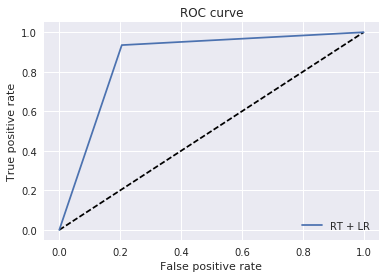

*********************************
113659
*********************************
Accuracy: 0.90
Precision: 0.944100437425
Recall: 0.928591384031
F1-Score: 0.936281690141
[[ 3851   984]
 [ 1278 16619]]
Roc Area: 0.862537677538


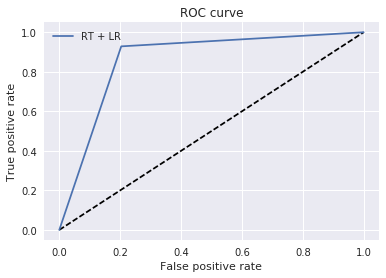

*********************************
117800
*********************************
Accuracy: 0.91
Precision: 0.948368825227
Recall: 0.932922582373
F1-Score: 0.940582293523
[[ 3947   948]
 [ 1252 17413]]
Roc Area: 0.869627787612


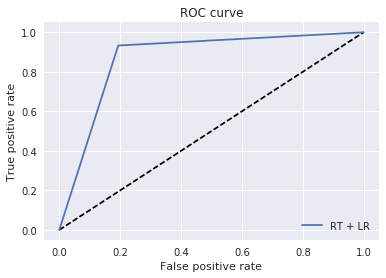

*********************************
121916
*********************************
Accuracy: 0.91
Precision: 0.945295635234
Recall: 0.934422816696
F1-Score: 0.93982778025
[[ 4131  1039]
 [ 1260 17954]]
Roc Area: 0.866727849354


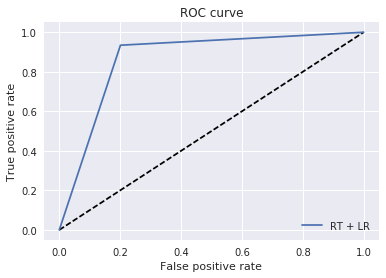

*********************************
126024
*********************************
Accuracy: 0.90
Precision: 0.941976333818
Recall: 0.928816334886
F1-Score: 0.935350047669
[[ 4546  1118]
 [ 1391 18150]]
Roc Area: 0.865714664618


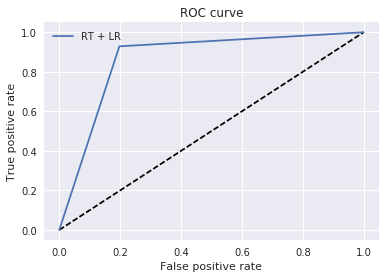

*********************************
130083
*********************************
Accuracy: 0.90
Precision: 0.944974175606
Recall: 0.930419050413
F1-Score: 0.937640131076
[[ 4458  1108]
 [ 1423 19028]]
Roc Area: 0.865676647018


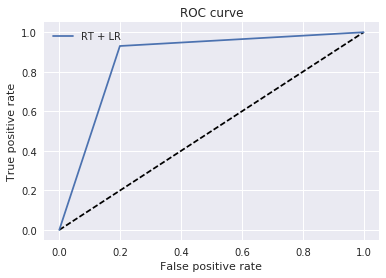

*********************************
134118
*********************************
Accuracy: 0.90
Precision: 0.945518958254
Recall: 0.931428032447
F1-Score: 0.93842060249
[[ 4482  1138]
 [ 1454 19750]]
Roc Area: 0.864468464622


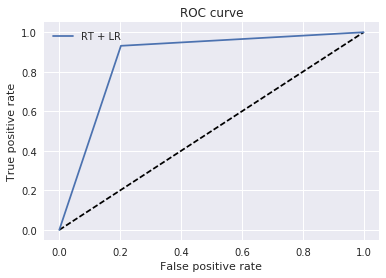

*********************************
138107
*********************************
Accuracy: 0.90
Precision: 0.944684966839
Recall: 0.93172526574
F1-Score: 0.938160362256
[[ 4407  1201]
 [ 1503 20511]]
Roc Area: 0.858783460259


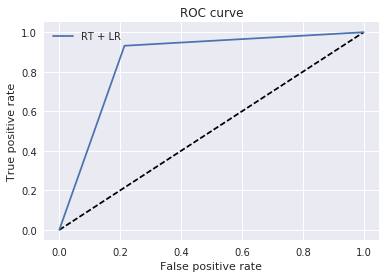

*********************************
142083
*********************************
Accuracy: 0.91
Precision: 0.946329701732
Recall: 0.935139428168
F1-Score: 0.940701287173
[[ 4551  1202]
 [ 1470 21194]]
Roc Area: 0.863102479598


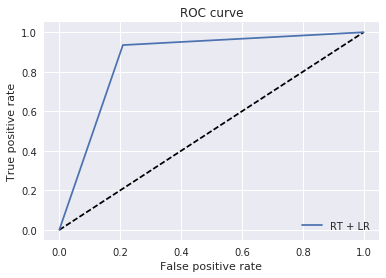

*********************************
146040
*********************************
Accuracy: 0.91
Precision: 0.950315389268
Recall: 0.933537051184
F1-Score: 0.941851502955
[[ 4496  1150]
 [ 1566 21996]]
Roc Area: 0.864926513548


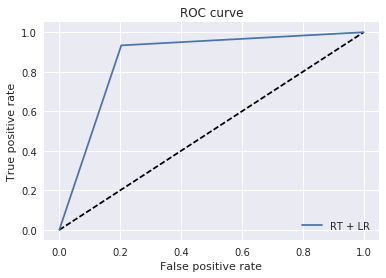

*********************************
149992
*********************************
Accuracy: 0.90
Precision: 0.942926662682
Recall: 0.932733721814
F1-Score: 0.937802496391
[[ 4980  1337]
 [ 1593 22089]]
Roc Area: 0.860541310804


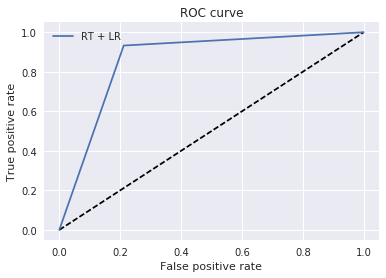

*********************************
153942
*********************************
Accuracy: 0.90
Precision: 0.943171598647
Recall: 0.924562360942
F1-Score: 0.933774272874
[[ 5641  1327]
 [ 1797 22024]]
Roc Area: 0.867060170138


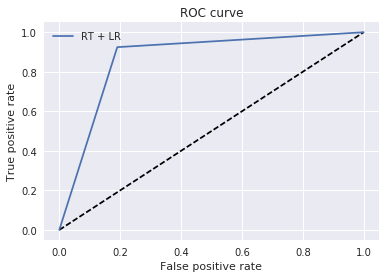

*********************************
157880
*********************************
Accuracy: 0.90
Precision: 0.941934156379
Recall: 0.929653547784
F1-Score: 0.935753561865
[[ 5544  1411]
 [ 1732 22889]]
Roc Area: 0.86338895937


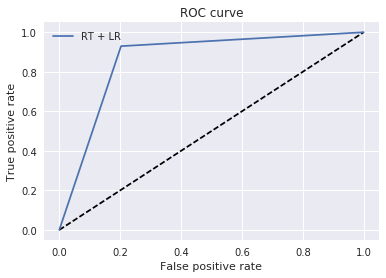

*********************************
161812
*********************************
Accuracy: 0.90
Precision: 0.944392993759
Recall: 0.927732289071
F1-Score: 0.935988506665
[[ 5701  1381]
 [ 1827 23454]]
Roc Area: 0.86636543852


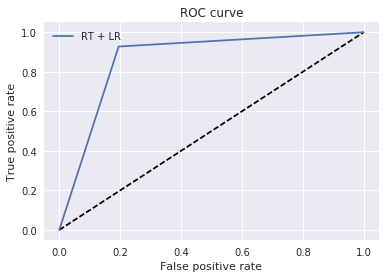

*********************************
165741
*********************************
Accuracy: 0.90
Precision: 0.942644363863
Recall: 0.930454527961
F1-Score: 0.936509781135
[[ 5695  1471]
 [ 1807 24176]]
Roc Area: 0.862589809333


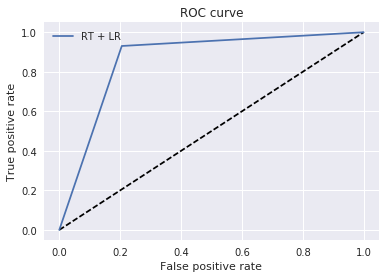

*********************************
169634
*********************************
Accuracy: 0.90
Precision: 0.942562092489
Recall: 0.933868558626
F1-Score: 0.938195186915
[[ 5623  1524]
 [ 1771 25009]]
Roc Area: 0.860316117847


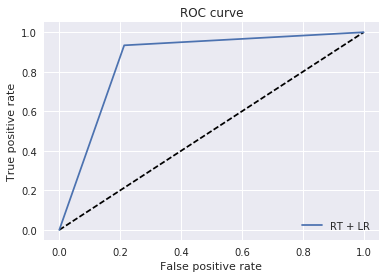

*********************************
173491
*********************************
Accuracy: 0.90
Precision: 0.938440288199
Recall: 0.92681488036
F1-Score: 0.932591355964
[[ 5927  1649]
 [ 1985 25138]]
Roc Area: 0.854576922756


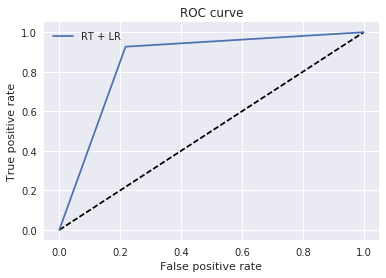

*********************************
177231
*********************************
Accuracy: 0.89
Precision: 0.938225800467
Recall: 0.924100127901
F1-Score: 0.931109392835
[[ 6417  1665]
 [ 2077 25288]]
Roc Area: 0.859043382436


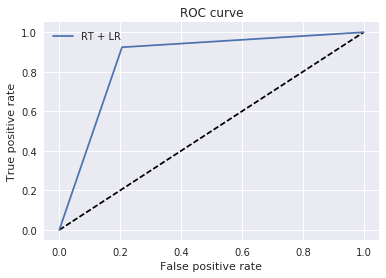

*********************************
180968
*********************************
Accuracy: 0.89
Precision: 0.940088921823
Recall: 0.917615999421
F1-Score: 0.928716531542
[[ 6926  1617]
 [ 2278 25373]]
Roc Area: 0.864169114073


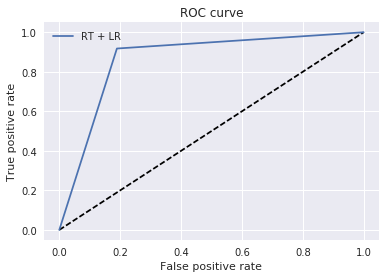

*********************************
184682
*********************************
Accuracy: 0.90
Precision: 0.939009532
Recall: 0.924499012137
F1-Score: 0.931697777778
[[ 6891  1702]
 [ 2140 26204]]
Roc Area: 0.863215408547


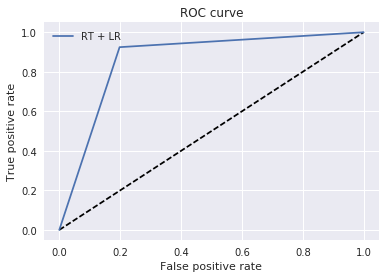

*********************************
188314
*********************************
Accuracy: 0.89
Precision: 0.935978390514
Recall: 0.925491692393
F1-Score: 0.930705502747
[[ 7009  1825]
 [ 2148 26681]]
Roc Area: 0.859451755185


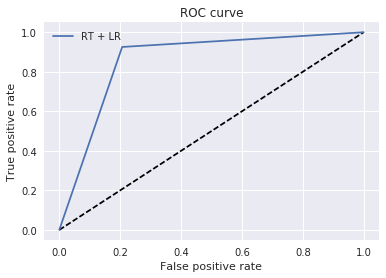

*********************************
191940
*********************************
Accuracy: 0.89
Precision: 0.937358955071
Recall: 0.924368614492
F1-Score: 0.930818464255
[[ 6899  1832]
 [ 2243 27414]]
Roc Area: 0.857270780731


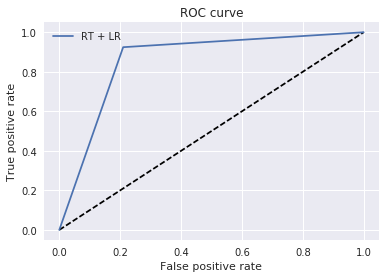

*********************************
195558
*********************************
Accuracy: 0.89
Precision: 0.936012817891
Recall: 0.923638443166
F1-Score: 0.929784460134
[[ 7508  1877]
 [ 2270 27457]]
Roc Area: 0.861819221583


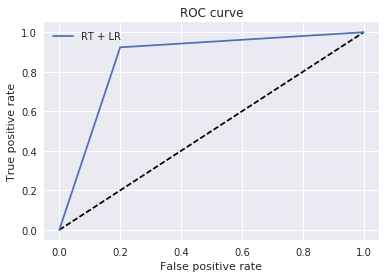

*********************************
199168
*********************************
Accuracy: 0.89
Precision: 0.934227959912
Recall: 0.917153053397
F1-Score: 0.925611767478
[[ 7915  1936]
 [ 2484 27499]]
Roc Area: 0.860312391078


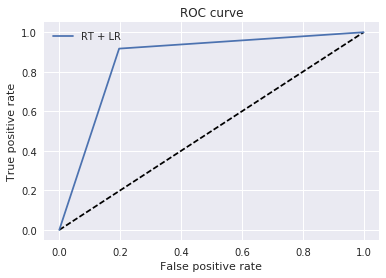

*********************************
202774
*********************************
Accuracy: 0.89
Precision: 0.935897009414
Recall: 0.916506499006
F1-Score: 0.926100266632
[[ 7931  1927]
 [ 2563 28134]]
Roc Area: 0.860515371638


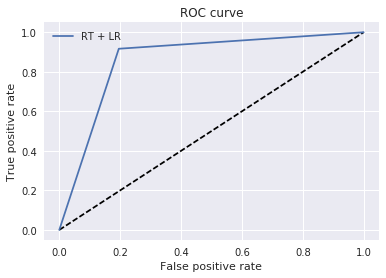

*********************************
206372
*********************************
Accuracy: 0.89
Precision: 0.931910059804
Recall: 0.913865408558
F1-Score: 0.922799530214
[[ 8715  2038]
 [ 2629 27893]]
Roc Area: 0.862168452442


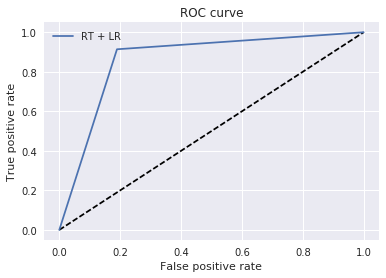

*********************************
209958
*********************************
Accuracy: 0.89
Precision: 0.934131541172
Recall: 0.915084691595
F1-Score: 0.924510025508
[[ 8683  2019]
 [ 2657 28633]]
Roc Area: 0.863214182837


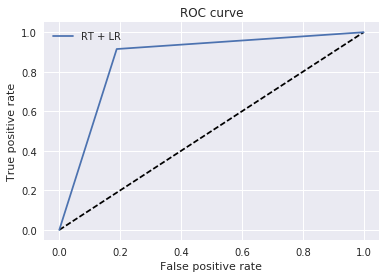

*********************************
213543
*********************************
Accuracy: 0.89
Precision: 0.933577106518
Recall: 0.917990245123
F1-Score: 0.925718069174
[[ 8636  2089]
 [ 2623 29361]]
Roc Area: 0.861605845172


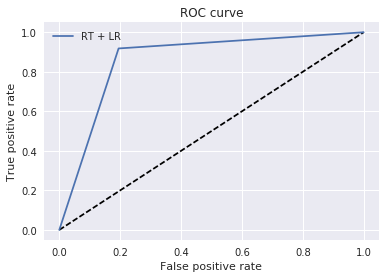

*********************************
217123
*********************************
Accuracy: 0.89
Precision: 0.92936802974
Recall: 0.916653828378
F1-Score: 0.922967145472
[[ 8709  2261]
 [ 2705 29750]]
Roc Area: 0.855273131144


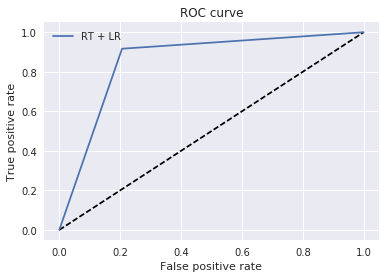

*********************************
220687
*********************************
Accuracy: 0.88
Precision: 0.924714992471
Recall: 0.91612883585
F1-Score: 0.920401890168
[[ 8840  2450]
 [ 2755 30093]]
Roc Area: 0.849561317836


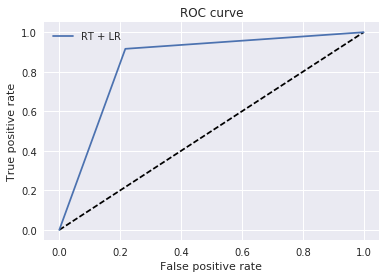

*********************************
224237
*********************************
Accuracy: 0.88
Precision: 0.927194860814
Recall: 0.917674099281
F1-Score: 0.922409913289
[[ 8933  2414]
 [ 2758 30743]]
Roc Area: 0.85246532143


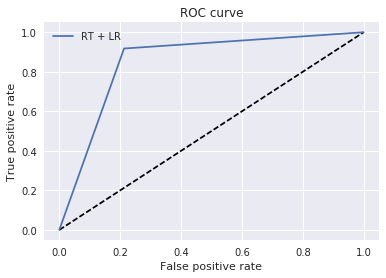

*********************************
227763
*********************************
Accuracy: 0.88
Precision: 0.926299924642
Recall: 0.909709887507
F1-Score: 0.917929952953
[[ 9328  2445]
 [ 3050 30730]]
Roc Area: 0.851015650455


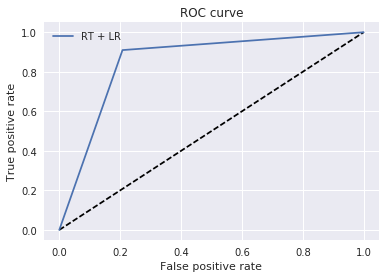

*********************************
231269
*********************************
Accuracy: 0.88
Precision: 0.927087962551
Recall: 0.909730499753
F1-Score: 0.918327219369
[[ 9396  2461]
 [ 3105 31292]]
Roc Area: 0.851086891101


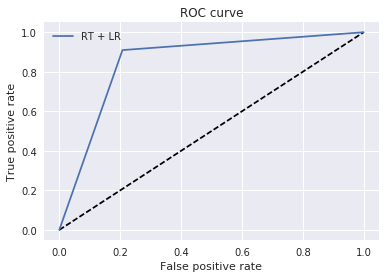

*********************************
234772
*********************************
Accuracy: 0.88
Precision: 0.924925273513
Recall: 0.913604311185
F1-Score: 0.91922993727
[[ 9482  2587]
 [ 3014 31872]]
Roc Area: 0.849626747522


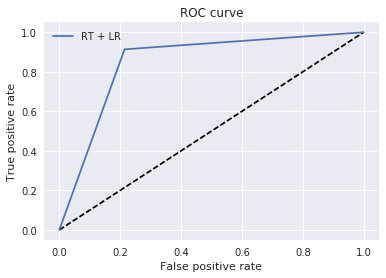

*********************************
238258
*********************************
Accuracy: 0.88
Precision: 0.923405108235
Recall: 0.910628564974
F1-Score: 0.916972333589
[[ 9563  2675]
 [ 3165 32249]]
Roc Area: 0.846023548707


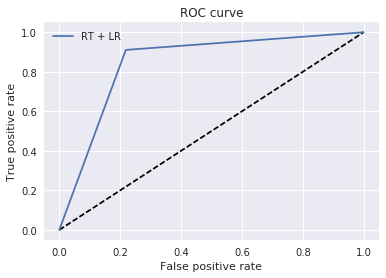

*********************************
241728
*********************************
Accuracy: 0.88
Precision: 0.923070427293
Recall: 0.911068511419
F1-Score: 0.917030201342
[[ 9619  2733]
 [ 3201 32793]]
Roc Area: 0.844904398196


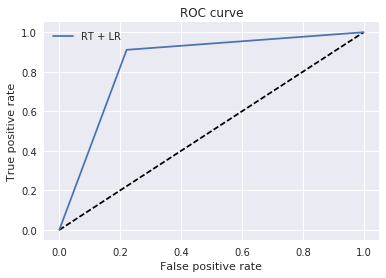

*********************************
245186
*********************************
Accuracy: 0.88
Precision: 0.925115239173
Recall: 0.911454367453
F1-Score: 0.918233996795
[[ 9553  2713]
 [ 3256 33516]]
Roc Area: 0.845136934257


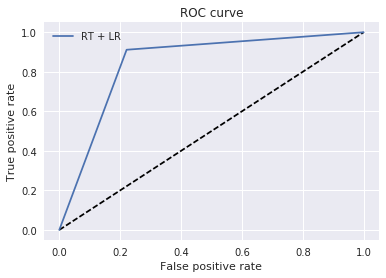

*********************************
248630
*********************************
Accuracy: 0.88
Precision: 0.923727417495
Recall: 0.910996182069
F1-Score: 0.917317628454
[[10017  2778]
 [ 3287 33644]]
Roc Area: 0.846940060554


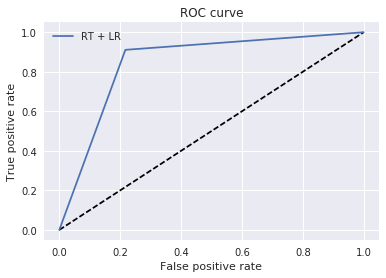

*********************************
251991
*********************************
Accuracy: 0.88
Precision: 0.926062697108
Recall: 0.912170773152
F1-Score: 0.919064243008
[[ 9992  2743]
 [ 3308 34356]]
Roc Area: 0.848390058739


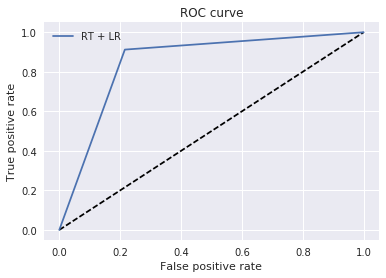

*********************************
255339
*********************************
Accuracy: 0.88
Precision: 0.92363994464
Recall: 0.911174709867
F1-Score: 0.917364984536
[[10113  2869]
 [ 3383 34703]]
Roc Area: 0.845088202261


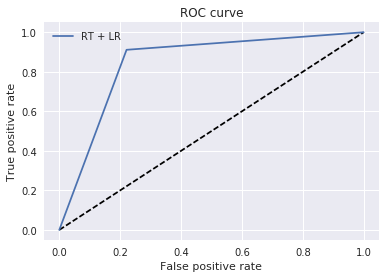

*********************************
258675
*********************************
Accuracy: 0.88
Precision: 0.920475610402
Recall: 0.914349598843
F1-Score: 0.91740237803
[[10717  3003]
 [ 3256 34759]]
Roc Area: 0.847736023911


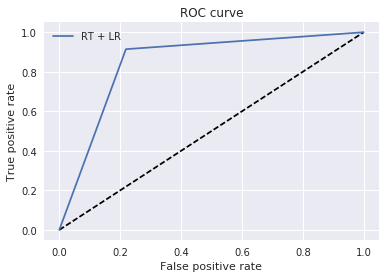

*********************************
262001
*********************************
Accuracy: 0.88
Precision: 0.924136125654
Recall: 0.912125675012
F1-Score: 0.918091621913
[[10800  2898]
 [ 3401 35302]]
Roc Area: 0.85028097154


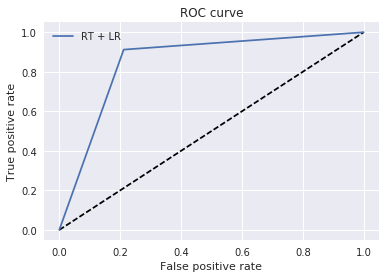

*********************************
265325
*********************************
Accuracy: 0.88
Precision: 0.924250245187
Recall: 0.91191749427
F1-Score: 0.91804245283
[[10860  2935]
 [ 3459 35811]]
Roc Area: 0.849579624265


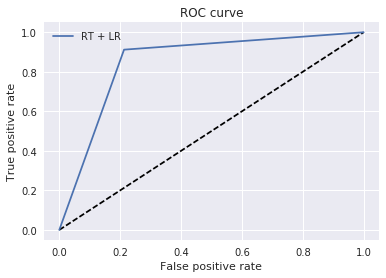

*********************************
268638
*********************************
Accuracy: 0.88
Precision: 0.92287207061
Recall: 0.913397093155
F1-Score: 0.918110136883
[[10850  3041]
 [ 3450 36387]]
Roc Area: 0.8472391844


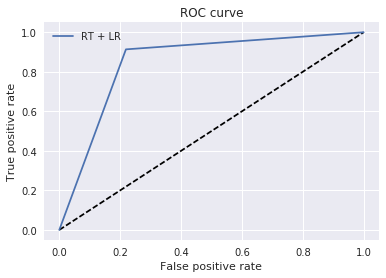

*********************************
271921
*********************************
Accuracy: 0.88
Precision: 0.923816384321
Recall: 0.916305311915
F1-Score: 0.92004551864
[[10730  3067]
 [ 3397 37191]]
Roc Area: 0.847005305084


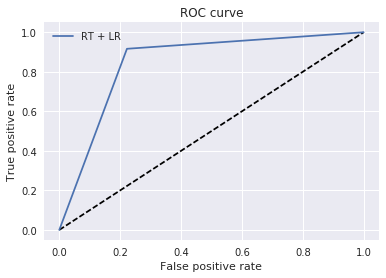

*********************************
275194
*********************************
Accuracy: 0.88
Precision: 0.923069321607
Recall: 0.914350039154
F1-Score: 0.918688992157
[[11061  3114]
 [ 3500 37364]]
Roc Area: 0.847333749736


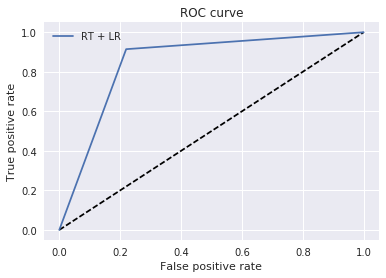

*********************************
278459
*********************************
Accuracy: 0.88
Precision: 0.922451061349
Recall: 0.914675850111
F1-Score: 0.918547002346
[[10975  3193]
 [ 3543 37981]]
Roc Area: 0.844654412915


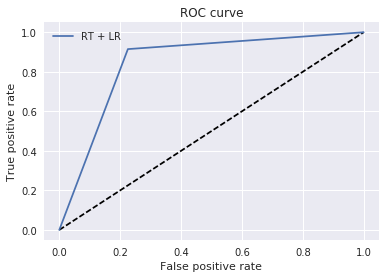

*********************************
281719
*********************************
Accuracy: 0.88
Precision: 0.923640217758
Recall: 0.912040340612
F1-Score: 0.917803628704
[[11132  3170]
 [ 3698 38344]]
Roc Area: 0.845196509279


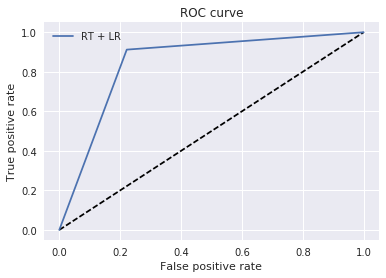

*********************************
284977
*********************************
Accuracy: 0.88
Precision: 0.920834416121
Recall: 0.912363653387
F1-Score: 0.916579464086
[[10923  3351]
 [ 3744 38978]]
Roc Area: 0.838800574066


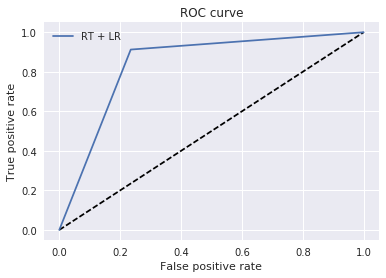

*********************************
288193
*********************************
Accuracy: 0.88
Precision: 0.922288382954
Recall: 0.915426690771
F1-Score: 0.91884472671
[[11165  3328]
 [ 3649 39497]]
Roc Area: 0.842899297224


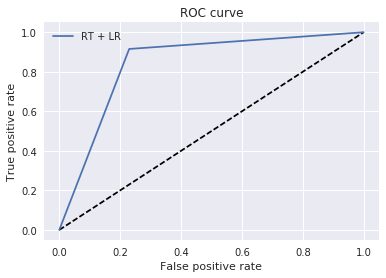

*********************************
291407
*********************************
Accuracy: 0.88
Precision: 0.921833635224
Recall: 0.911378455322
F1-Score: 0.916576231268
[[11360  3366]
 [ 3860 39696]]
Roc Area: 0.841401573172


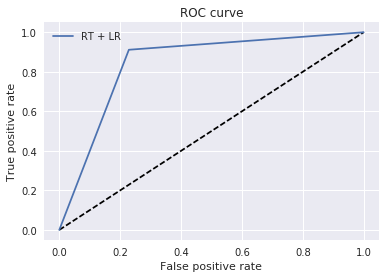

*********************************
294607
*********************************
Accuracy: 0.88
Precision: 0.921891058582
Recall: 0.914683888511
F1-Score: 0.918273332196
[[11372  3420]
 [ 3765 40365]]
Roc Area: 0.841738915591


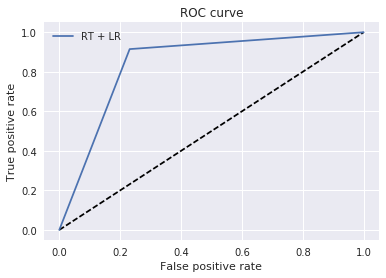

*********************************
297794
*********************************
Accuracy: 0.88
Precision: 0.921188218129
Recall: 0.910949793719
F1-Score: 0.916040398545
[[11745  3457]
 [ 3950 40407]]
Roc Area: 0.841772752405


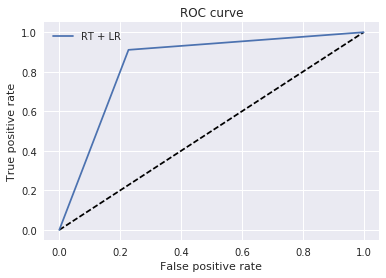

*********************************
300977
*********************************
Accuracy: 0.87
Precision: 0.919335409232
Recall: 0.908045977011
F1-Score: 0.913655820467
[[12103  3549]
 [ 4096 40448]]
Roc Area: 0.840650895482


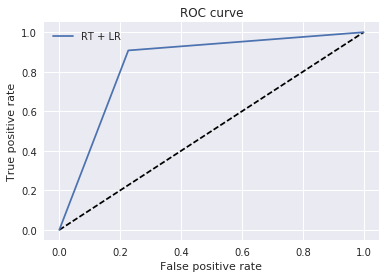

*********************************
304141
*********************************
Accuracy: 0.87
Precision: 0.92153551728
Recall: 0.904390481031
F1-Score: 0.91288250513
[[12087  3485]
 [ 4327 40930]]
Roc Area: 0.840295677197


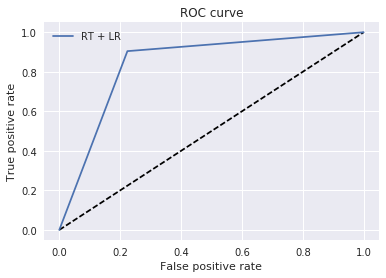

*********************************
307292
*********************************
Accuracy: 0.87
Precision: 0.919913419913
Recall: 0.909289378889
F1-Score: 0.914570547095
[[12028  3626]
 [ 4155 41650]]
Roc Area: 0.838827645877


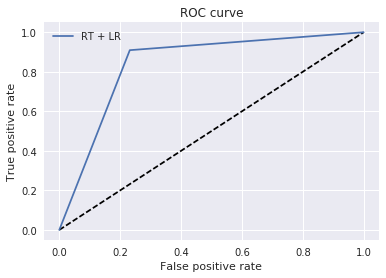

*********************************
310430
*********************************
Accuracy: 0.88
Precision: 0.922707318671
Recall: 0.90979176088
F1-Score: 0.916204024983
[[12110  3539]
 [ 4189 42248]]
Roc Area: 0.841821562592


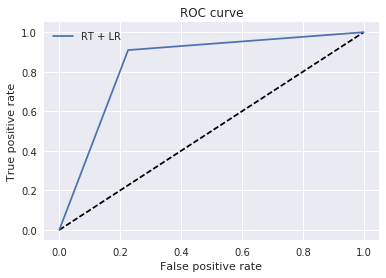

*********************************
313563
*********************************
Accuracy: 0.88
Precision: 0.919489529356
Recall: 0.915822474354
F1-Score: 0.917652338366
[[12064  3760]
 [ 3947 42942]]
Roc Area: 0.839104361545


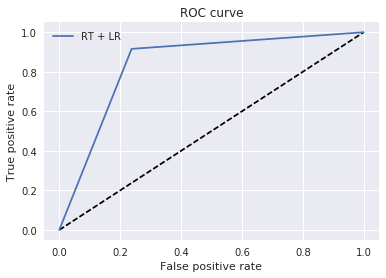

*********************************
316694
*********************************
Accuracy: 0.88
Precision: 0.921258669844
Recall: 0.913099405339
F1-Score: 0.917160891299
[[12216  3701]
 [ 4121 43301]]
Roc Area: 0.840290357316


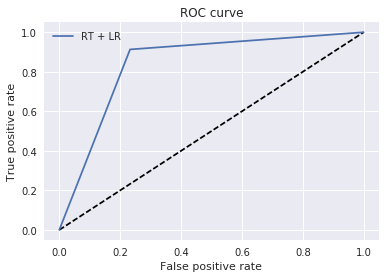

*********************************
319812
*********************************
Accuracy: 0.88
Precision: 0.922544488823
Recall: 0.915062640007
F1-Score: 0.918788333177
[[12047  3704]
 [ 4095 44117]]
Roc Area: 0.839951483802


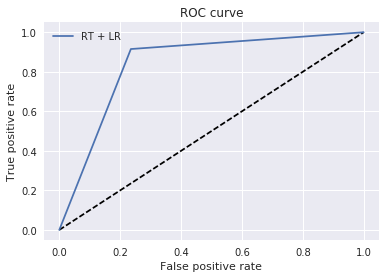

*********************************
322912
*********************************
Accuracy: 0.88
Precision: 0.924060585996
Recall: 0.915460620721
F1-Score: 0.919740500463
[[12131  3670]
 [ 4124 44658]]
Roc Area: 0.841598419974


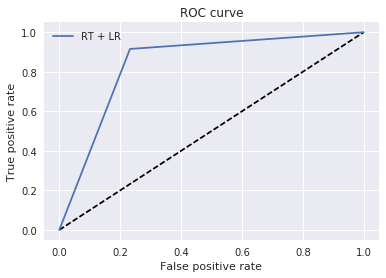

*********************************
326004
*********************************
Accuracy: 0.88
Precision: 0.924003117821
Recall: 0.913139544312
F1-Score: 0.918539211288
[[12164  3705]
 [ 4285 45047]]
Roc Area: 0.839832737686


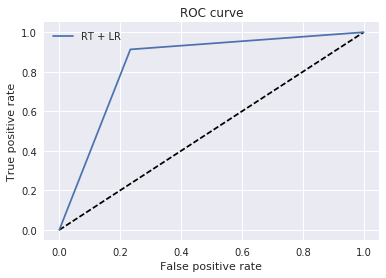

*********************************
329094
*********************************
Accuracy: 0.88
Precision: 0.923249017434
Recall: 0.917847195784
F1-Score: 0.92054018207
[[12104  3808]
 [ 4100 45807]]
Roc Area: 0.839265478234


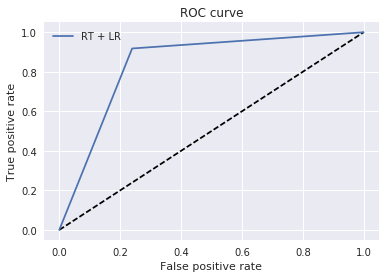

*********************************
332183
*********************************
Accuracy: 0.88
Precision: 0.926428072974
Recall: 0.918571089673
F1-Score: 0.922482851726
[[12163  3690]
 [ 4119 46465]]
Roc Area: 0.84290378744


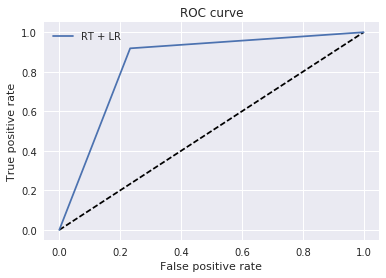

*********************************
335256
*********************************
Accuracy: 0.88
Precision: 0.924769509548
Recall: 0.915382189459
F1-Score: 0.920051905342
[[12540  3778]
 [ 4293 46441]]
Roc Area: 0.841929359223


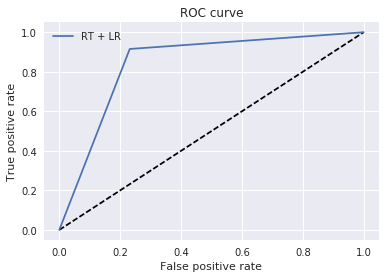

*********************************
338323
*********************************
Accuracy: 0.88
Precision: 0.924156149105
Recall: 0.916854325206
F1-Score: 0.920490756892
[[12277  3876]
 [ 4283 47229]]
Roc Area: 0.838449449485


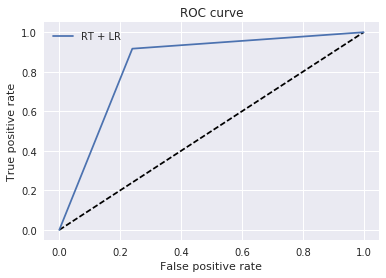

*********************************
341389
*********************************
Accuracy: 0.88
Precision: 0.924656863705
Recall: 0.913160337226
F1-Score: 0.918872642014
[[12714  3848]
 [ 4491 47225]]
Roc Area: 0.840410623872


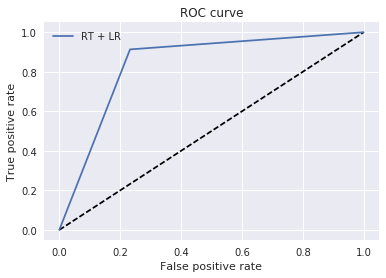

*********************************
344448
*********************************
Accuracy: 0.88
Precision: 0.922790369383
Recall: 0.912556227703
F1-Score: 0.917644765061
[[13376  3938]
 [ 4510 47066]]
Roc Area: 0.842555115122


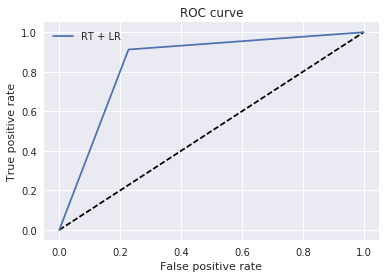

*********************************
347486
*********************************
Accuracy: 0.88
Precision: 0.921462017724
Recall: 0.913893686433
F1-Score: 0.917662247572
[[13329  4059]
 [ 4487 47623]]
Roc Area: 0.840228416715


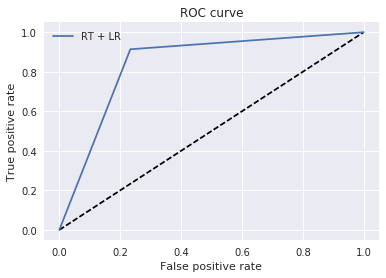

*********************************
350523
*********************************
Accuracy: 0.87
Precision: 0.919815224714
Recall: 0.91066562494
F1-Score: 0.915217557837
[[13462  4166]
 [ 4688 47789]]
Roc Area: 0.837168528377


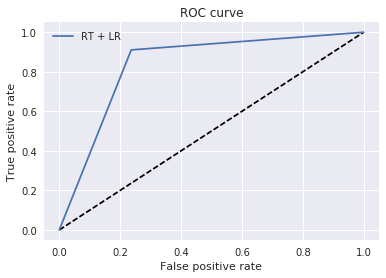

*********************************
353553
*********************************
Accuracy: 0.88
Precision: 0.921372843068
Recall: 0.911989628154
F1-Score: 0.916657223796
[[13348  4142]
 [ 4684 48537]]
Roc Area: 0.83758429378


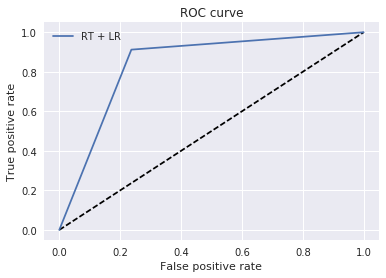

*********************************
356578
*********************************
Accuracy: 0.88
Precision: 0.922389684491
Recall: 0.91255826045
F1-Score: 0.917447634694
[[13328  4135]
 [ 4709 49144]]
Roc Area: 0.837885956085


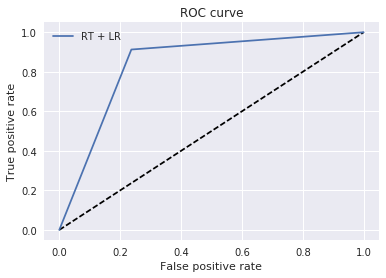

*********************************
359603
*********************************
Accuracy: 0.88
Precision: 0.921737997282
Recall: 0.912093580179
F1-Score: 0.916890427955
[[13432  4204]
 [ 4772 49513]]
Roc Area: 0.836858765594


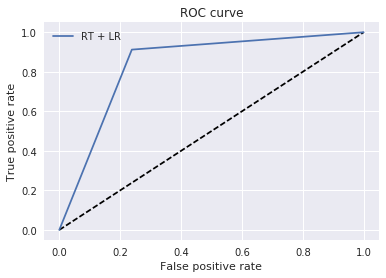

*********************************
362620
*********************************
Accuracy: 0.88
Precision: 0.922253147291
Recall: 0.913447495253
F1-Score: 0.917829201405
[[13530  4218]
 [ 4741 50035]]
Roc Area: 0.83789345689


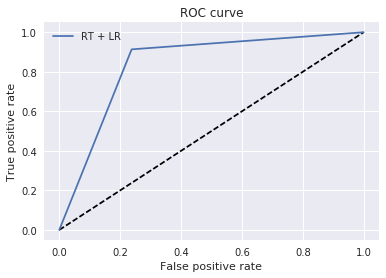

*********************************
365629
*********************************
Accuracy: 0.88
Precision: 0.922069141938
Recall: 0.912234715644
F1-Score: 0.917125565673
[[13543  4265]
 [ 4855 50463]]
Roc Area: 0.836367807058


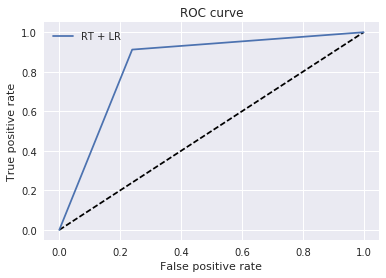

*********************************
368637
*********************************
Accuracy: 0.87
Precision: 0.920796034354
Recall: 0.908815570172
F1-Score: 0.914766577675
[[13567  4362]
 [ 5088 50711]]
Roc Area: 0.83276129058


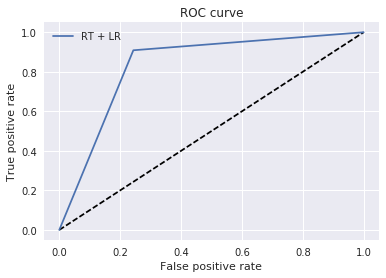

*********************************
371634
*********************************
Accuracy: 0.87
Precision: 0.917403757814
Recall: 0.911704679724
F1-Score: 0.914545340265
[[13884  4585]
 [ 4932 50926]]
Roc Area: 0.83172542449


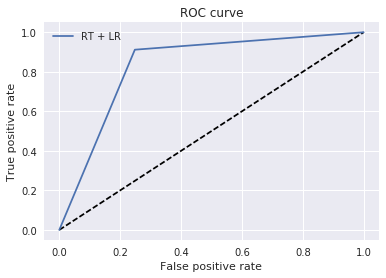

*********************************
374623
*********************************
Accuracy: 0.87
Precision: 0.919390833943
Recall: 0.910821040716
F1-Score: 0.915085873708
[[13872  4515]
 [ 5042 51496]]
Roc Area: 0.832633558374


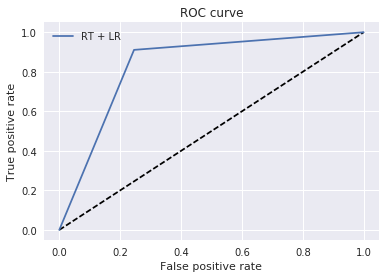

*********************************


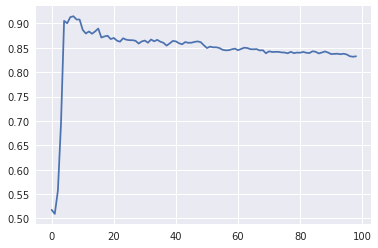

In [59]:
rocs = []


for i in range(1, 100):
    
    features = list(original_feats)
    df_train_ = df_train[df_train["user_id_id"].isin(register_count[:i].index.values)]
    print(len(df_train_))
    
    X_train, X_test, y_train, y_test = train_test_split(df_train_[features], df_train_[target], test_size = 0.2)

    from sklearn import feature_selection
    all_features = features
    function_rule_selection = feature_selection.f_classif
    alpha_cutoff = 0.01

    selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
    selection_rule.fit(X_train, y_train);

    all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
    #print(all_pvalues)
    filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
    #print(filtered_pvalues)
    all_select_features = list(map(lambda x: x[1], filtered_pvalues))
    
    features = all_select_features
    X_train, X_test, y_train, y_test = train_test_split(df_train_[features], df_train_[target], test_size = 0.2)
    
    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(n_jobs=-1)
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    
    rocs.append(complete_report(y_test, model.predict(X_test)))
    
plt.plot(rocs)    

877
*********************************
Accuracy: 0.86
Precision: 0.841666666667
Recall: 0.952830188679
F1-Score: 0.893805309735
[[ 51  19]
 [  5 101]]
Roc Area: 0.840700808625


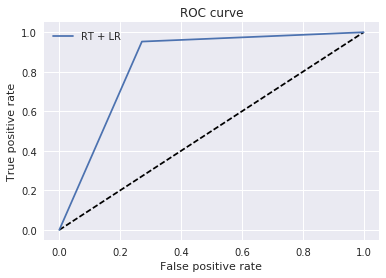

*********************************
10241
*********************************
Accuracy: 0.74
Precision: 0.793103448276
Recall: 0.777152051488
F1-Score: 0.785046728972
[[554 252]
 [277 966]]
Roc Area: 0.73224848232


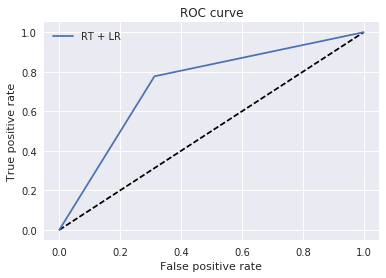

*********************************
32425
*********************************
Accuracy: 0.76
Precision: 0.808205875212
Recall: 0.807421780257
F1-Score: 0.807813637467
[[1572  790]
 [ 794 3329]]
Roc Area: 0.736479730095


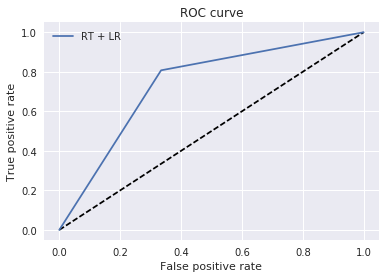

*********************************
67338
*********************************
Accuracy: 0.75
Precision: 0.801569638046
Recall: 0.80250967515
F1-Score: 0.802039381153
[[3247 1694]
 [1684 6843]]
Roc Area: 0.729832048666


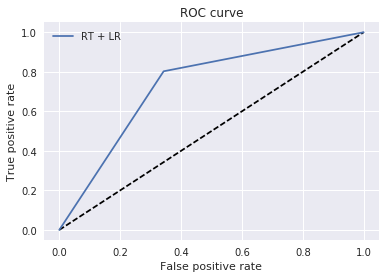

*********************************
116399
*********************************
Accuracy: 0.74
Precision: 0.797668038409
Recall: 0.787460220733
F1-Score: 0.792531261712
[[ 5561  2950]
 [ 3139 11630]]
Roc Area: 0.720424975835


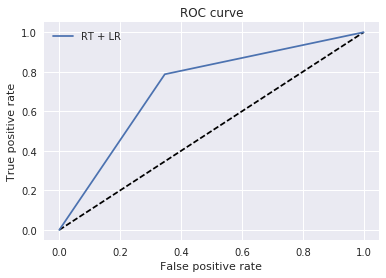

*********************************
182269
*********************************
Accuracy: 0.75
Precision: 0.806359000728
Recall: 0.804188034188
F1-Score: 0.805272054261
[[ 8535  4519]
 [ 4582 18818]]
Roc Area: 0.729005308652


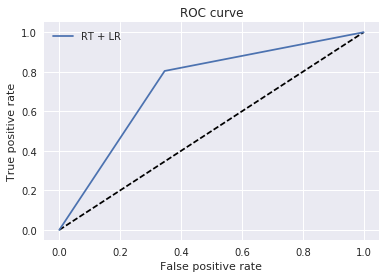

*********************************
267395
*********************************
Accuracy: 0.75
Precision: 0.80545491435
Recall: 0.80939620773
F1-Score: 0.807420751373
[[12434  6712]
 [ 6544 27789]]
Roc Area: 0.729413449107


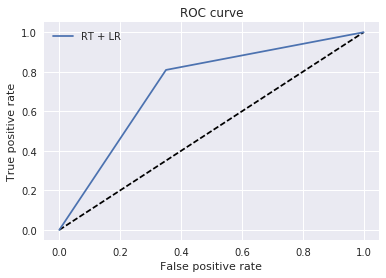

*********************************
375539
*********************************
Accuracy: 0.75
Precision: 0.806616827062
Recall: 0.811426197154
F1-Score: 0.809014364572
[[17609  9364]
 [ 9077 39058]]
Roc Area: 0.732132110181


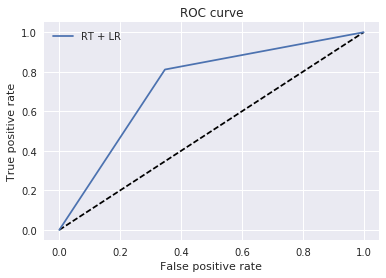

*********************************
510463
*********************************
Accuracy: 0.75
Precision: 0.805983830734
Recall: 0.814242990087
F1-Score: 0.810092359742
[[23311 12911]
 [12236 53635]]
Roc Area: 0.728901076513


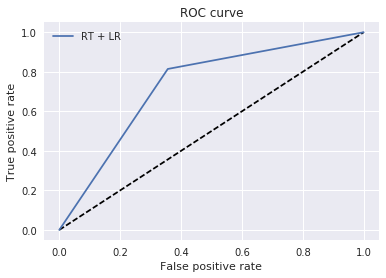

*********************************
675164
*********************************
Accuracy: 0.75
Precision: 0.807667096133
Recall: 0.816302286798
F1-Score: 0.811961733361
[[30469 17018]
 [16082 71464]]
Roc Area: 0.728965260947


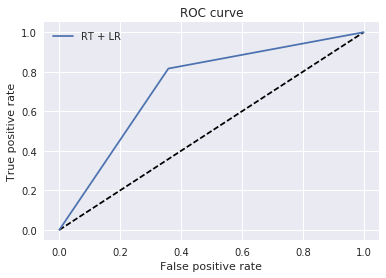

*********************************
874334
*********************************
Accuracy: 0.76
Precision: 0.809971688118
Recall: 0.816502516962
F1-Score: 0.813223990827
[[38761 21881]
 [20960 93265]]
Roc Area: 0.727839992362


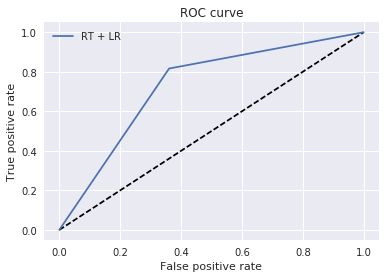

*********************************
1114940
*********************************
Accuracy: 0.76
Precision: 0.814075381608
Recall: 0.821128172944
F1-Score: 0.81758656759
[[ 48906  27491]
 [ 26221 120370]]
Roc Area: 0.730642100006


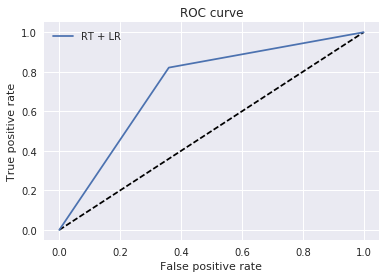

*********************************
1404430
*********************************
Accuracy: 0.76
Precision: 0.815735177781
Recall: 0.82112937505
F1-Score: 0.818423388275
[[ 60558  34473]
 [ 33244 152611]]
Roc Area: 0.729187031813


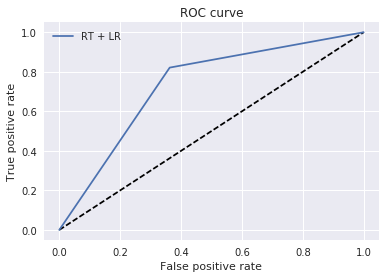

*********************************
1751360
*********************************
Accuracy: 0.76
Precision: 0.816674135245
Recall: 0.824773505047
F1-Score: 0.820703837848
[[ 75302  42956]
 [ 40655 191359]]
Roc Area: 0.730766904395


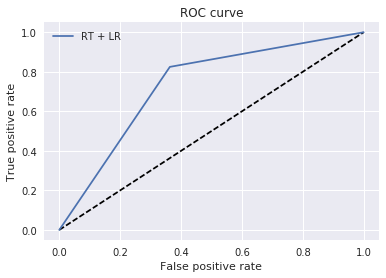

*********************************
2166774
*********************************
Accuracy: 0.76
Precision: 0.818017009617
Recall: 0.826590939055
F1-Score: 0.822281624856
[[ 92127  53002]
 [ 49981 238245]]
Roc Area: 0.730692406046


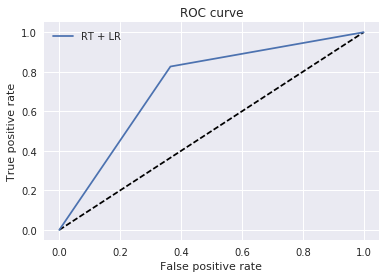

*********************************
2668852
*********************************
Accuracy: 0.76
Precision: 0.819152491348
Recall: 0.829711999776
F1-Score: 0.824398433439
[[110826  65480]
 [ 60872 296593]]
Roc Area: 0.729156137149


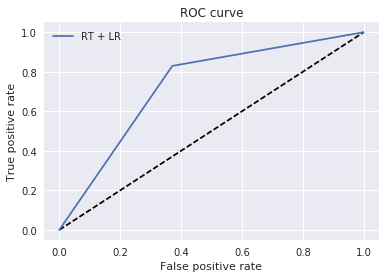

*********************************
3282745
*********************************
Accuracy: 0.76
Precision: 0.820643490778
Recall: 0.832768402463
F1-Score: 0.82666148901
[[133822  80490]
 [ 73956 368281]]
Roc Area: 0.728597236432


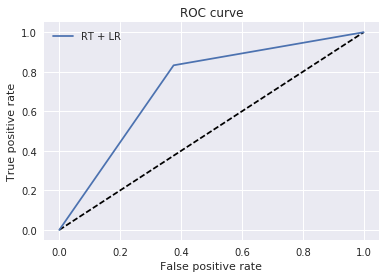

*********************************
4041093
*********************************
Accuracy: 0.77
Precision: 0.822529630719
Recall: 0.835089750377
F1-Score: 0.828762105256
[[163955  98361]
 [ 90025 455878]]
Roc Area: 0.730059170923


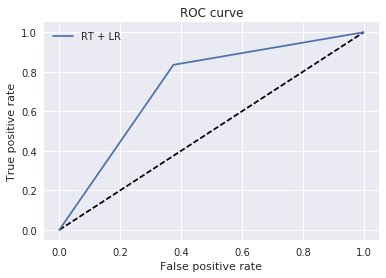

*********************************
5014840


MemoryError: 

In [61]:
rocs = []

for i in range(500, 19900, 1000):
    
    features = list(original_feats)
    df_train_ = df_train[df_train["user_id_id"].isin(register_count[-i:].index.values)]
    print(len(df_train_))
    
    X_train, X_test, y_train, y_test = train_test_split(df_train_[features], df_train_[target], test_size = 0.2)

    from sklearn import feature_selection
    all_features = features
    function_rule_selection = feature_selection.f_classif
    alpha_cutoff = 0.01

    selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
    selection_rule.fit(X_train, y_train);

    all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
    #print(all_pvalues)
    filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
    #print(filtered_pvalues)
    all_select_features = list(map(lambda x: x[1], filtered_pvalues))
    
    features = [feat for feat in all_select_features if feat != "user_id"]
    X_train, X_test, y_train, y_test = train_test_split(df_train_[features], df_train_[target], test_size = 0.2)
    
    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(n_jobs=-1)
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    
    rocs.append(complete_report(y_test, model.predict(X_test)))
    
plt.plot(rocs)    

In [58]:
rocs = []

for i in tqdm(range(0, 100)):
    
    features = list(original_feats)
    df_train_ = df_train[df_train["user_id_id"] == i]
    #print(len(df_train_))
    
    X_train, X_test, y_train, y_test = train_test_split(df_train_[features], df_train_[target], test_size = 0.2)

    from sklearn import feature_selection
    all_features = features
    function_rule_selection = feature_selection.f_classif
    alpha_cutoff = 0.01

    selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
    selection_rule.fit(X_train, y_train);

    all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
    #print(all_pvalues)
    filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
    #print(filtered_pvalues)
    all_select_features = list(map(lambda x: x[1], filtered_pvalues))
    
    features = all_select_features
    X_train, X_test, y_train, y_test = train_test_split(df_train_[features], df_train_[target], test_size = 0.2)
    
    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(n_jobs=-1)
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    
    rocs.append(metrics.roc_auc_score(y_test, model.predict(X_test)))
    
plt.plot(rocs)    


 11%|█         | 11/100 [00:04<00:39,  2.27it/s]/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [17 18 19 20 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 48 52 53 54 55 56] are constant.
  UserWarning)

 12%|█▏        | 12/100 [00:05<00:38,  2.28it/s]

 16%|█▌        | 16/100 [00:07<00:36,  2.28it/s]/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [17 18 19 20 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 52 53 54 55 56] are constant.
  UserWarning)

 21%|██        | 21/100 [00:09<00:34,  2.29it/s]/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [17 18 19 20 21 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 52 53 54 55 56] are constant.
  UserWarning)


ValueError: Found array with 0 feature(s) (shape=(3336, 0)) while a minimum of 1 is required.

### Feature Selection

In [397]:


# print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
#                                                         len(all_features), 
#                                                         len(filtered_pvalues)*100/float(len(all_features))))
# print(all_select_features)
# #print(filtered_pvalues)

13 selected variables from 42, 30.95%
['genre_id', 'media_id', 'album_id', 'context_type', 'user_id', 'media_rank', 'nmidia_PROP_diff', 'platform_name_1', 'platform_family_2', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_3']


In [400]:
# %timeit
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

In [401]:
# print(model.score(X_test, y_test))
# complete_report(y_test, model.predict(X_test))

acc: 0.70345496362865445  
roc: 0.6912675674785278

In [403]:
# confusion_matrix(y_test, model.predict(X_test))

0.97626582278481011

*********************************
Accuracy: 0.98
Precision: 0.982371794872
Recall: 0.993517017828
F1-Score: 0.987912973409
[[   8   22]
 [   8 1226]]
Roc Area: 0.630091842247


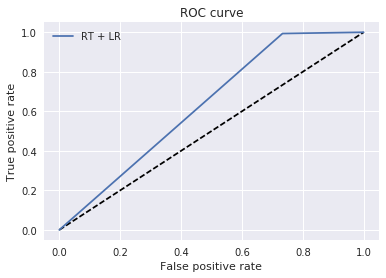

*********************************


0.63009184224743386

In [405]:
complete_report(y_test, model.predict(X_test))

0.7434

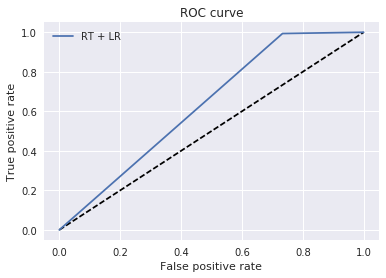

In [406]:
roc_curve_label(y_test, model.predict(X_test))

In [407]:
print(len(df_test))

19918


In [408]:
pd.isnull(df_test).sum().sum()

0

In [409]:
np.sum(np.isinf(df_test)).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

.7411

In [410]:
df_test_group_1 = df_test#[df_test["user_id"].isin(user_for_specific_model)].copy(deep=True)
df_test_group_1["media_decade_1"] = 0
p = model.predict_proba(df_test_group_1[features])
p = p[:, 1]
df_test_group_1["prediction"] = p
df_test_group_1["prediction"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: prediction, dtype: float64

In [411]:
df_test_group_1.fillna(0, inplace=True)

In [412]:
print(len(df_test))
print(len(df_test_group_1))
df_test_group_1[["prediction", "user_id_id"]]
df_test_group_1[["prediction", "user_id_id"]].to_csv("group1.csv")

19918
19918


In [413]:
import gc
gc.collect()
del df_test_group_1

In [414]:
import pandas as pd
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount
df_train = pd.read_csv("../data/train_data4.csv")
df_test = pd.read_csv("../data/test_data4.csv")

df_train["user_id_id"] = df_train["user_id"]
df_test["user_id_id"] = df_test["user_id"]

# df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# # pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]
# df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
# df_user.columns.values
# df_train = pd.merge(df_train, df_user, on="user_id")
# df_test = pd.merge(df_test, df_user, on="user_id")
# del df_user


### select users for general

#df_train = df_train[df_train["user_id"].isin(user_for_general_model)]

threshold = 1

register_count = df_train["user_id"].value_counts()

user_for_general_model = register_count[(register_count <= threshold)].index
user_for_specific_model = register_count[(register_count > threshold)].index
print(len(user_for_general_model))
print(len(user_for_specific_model))

cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "artist_radio",
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
                   "user_age",
                   "user_age_group",
                   "media_decade",
                   "user_gender", 
                   "user_age_group", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id",
                "artist_fans"]


target = "is_listened"

df_test = df_test[df_test["user_id"].isin(user_for_general_model)]
df_train.columns

te = TargetEncoder(cols_for_target_encoder, "is_listened")
te.fit(df_train)
te.transform(df_train)
te.transform(df_test)
del te

rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

%timeit
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text"]#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

features = [col for col in df_train.columns.values if col != target]
features

252
19666


['Unnamed: 0',
 'Unnamed: 0.1',
 'genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'diff_user_song_age',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'user_id_id',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'user_age_19',
 'user_age_20',
 'user_age_21',
 'user_age_22',
 'user_age_23',
 'user_age_24',
 'user_age_25',
 'user_age_26',
 'user_age_27',
 'user_age_28',
 'user_age_29',
 'user_age_30',
 'user_age_group_1',
 'user_age_group_2',
 'media_decade_2',
 'media_decade_3',
 'media_decade_4',
 'media_decade_5',
 'media_decade_6',
 'media_decade_7',
 'media_decade_8',
 'media_decade_9',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEE

In [415]:
features

['Unnamed: 0',
 'Unnamed: 0.1',
 'genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'diff_user_song_age',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'user_id_id',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'user_age_19',
 'user_age_20',
 'user_age_21',
 'user_age_22',
 'user_age_23',
 'user_age_24',
 'user_age_25',
 'user_age_26',
 'user_age_27',
 'user_age_28',
 'user_age_29',
 'user_age_30',
 'user_age_group_1',
 'user_age_group_2',
 'media_decade_2',
 'media_decade_3',
 'media_decade_4',
 'media_decade_5',
 'media_decade_6',
 'media_decade_7',
 'media_decade_8',
 'media_decade_9',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEE

In [416]:
len(df_test)

252

In [417]:
features =['genre_id', 
           'media_id', 
           'context_type', 
    #       'media_duration', 
           'listen_type', 
    #       'user_id', 
   #        'diff_ts_listen_AND_release_date_D', 
           'diff_ts_listen_AND_release_date_M', 
   #        'diff_ts_listen_AND_release_date_Y', 
    #       'release_date_YEAR', 
           'diff_user_song_age', 
           'artist_albuns', 
           'artist_fans', 
           'artist_radio', 
           'media_bpm', 
           'media_rank', 
           #'user_id_id', 
#            'nmidia_regular_listened', 
#            'nmidia_with_flow_listened', 
#            'nmidia_regular', 
#            'nmidia_with_flow', 
           'platform_name_1', 
           'platform_name_2', 
           'platform_family_1', 
           'platform_family_2', 
           'user_age_19', 
           'user_age_20', 
           'user_age_21', 
           'user_age_22', 
           'user_age_23', 
           'user_age_25', 
           'user_age_26', 
           'user_age_27', 
           'user_age_28', 
           'user_age_29', 
           'user_age_30', 
           'user_age_group_1',
           'user_age_group_2', 
#            'media_decade_1', 
           'media_decade_2',
           'media_decade_5', 
           'media_decade_7', 
           'media_decade_8', 
           'user_gender_1', 
           'user_age_group_1', 
           'user_age_group_2', 
           'ts_listen_DAY_OF_WEEK_1',
           'ts_listen_DAY_OF_WEEK_2', 
           'ts_listen_DAY_OF_WEEK_3', 
           'ts_listen_DAY_OF_WEEK_4', 
           'ts_listen_DAY_OF_WEEK_5',
           'ts_listen_PERIOD_OF_DAY_2', 
           'ts_listen_PERIOD_OF_DAY_3']

['genre_id', 'media_id', 'context_type', 'media_duration', 'listen_type', 'user_id', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_YEAR', 'diff_user_song_age', 'artist_albuns', 'artist_fans', 'artist_radio', 'media_bpm', 'media_rank', 'user_id_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'user_age_19', 'user_age_20', 'user_age_21', 'user_age_22', 'user_age_23', 'user_age_25', 'user_age_26', 'user_age_27', 'user_age_28', 'user_age_29', 'user_age_30', 'user_age_group_1', 'user_age_group_2', 'media_decade_1', 'media_decade_2', 'media_decade_5', 'media_decade_7', 'media_decade_8', 'user_gender_1', 'user_age_group_1', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_2', 'ts_listen_DAY_OF_WEEK_3', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']

In [418]:
### 0.7678

for column in features:
    try:
        df_test[column] = df_test[column].fillna(df_train[column].mean(skipna=True))
    except:
        df_test[column] = 0

#df_test = df_test.fillna(df_train.mean(skipna=True), axis=1)
df_test = df_test.applymap(lambda x : float(x))
pd.isnull(df_test).sum().sum()

0

In [419]:
# df_test = df_test.fillna(df_train.mean(skipna=True).to_dict, axis=1)#.dropna(axis=1, how='all')
# pd.isnull(df_test).sum()
# df_train.mean(skipna=True).to_dict

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.001

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

features = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

36 selected variables from 42, 85.71%
['genre_id', 'media_id', 'context_type', 'listen_type', 'diff_ts_listen_AND_release_date_M', 'diff_user_song_age', 'artist_albuns', 'artist_fans', 'media_bpm', 'media_rank', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'user_age_19', 'user_age_20', 'user_age_21', 'user_age_22', 'user_age_23', 'user_age_25', 'user_age_26', 'user_age_27', 'user_age_28', 'user_age_29', 'user_age_30', 'user_age_group_1', 'user_age_group_2', 'media_decade_2', 'media_decade_5', 'media_decade_7', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_2', 'ts_listen_DAY_OF_WEEK_3', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
df_test_group_2 = df_test #[df_test["user_id"].isin(user_for_general_model)].copy(deep=True)
df_test_group_2["media_decade_7"] = 0
p = model.predict_proba(df_test_group_2[features])
p = p[:, 1]
df_test_group_2["prediction"] = p
df_test_group_2["prediction"].head()

In [ ]:
df_test_group_2[["user_id_id", "prediction"]].to_csv("group2.csv")

In [ ]:
df_test_group_1 = pd.read_csv("group1.csv", index_col="user_id_id")
df_test_group_2 = pd.read_csv("group2.csv", index_col="user_id_id")

In [ ]:
df_test = pd.read_csv("../data/test_data4.csv")
#df_test = df_test["user_id"]
#df_test["user_id_id"] = df_test["user_id"]
# df_test = pd.merge(df_test, df_test_group_1[["user_id", "prediction"]], on="user_id")
# df_test = pd.merge(df_test, df_test_group_2[["user_id", "prediction"]], on="user_id")
df_test = pd.merge(df_test, df_test_group_1[["prediction"]], left_on="user_id", right_index=True, how="outer")
#df_test.join(df_test_group_2[["prediction"]])
df_test = pd.merge(df_test, df_test_group_2[["prediction"]], left_on="user_id", right_index=True, how="outer")

In [ ]:
print(len(df_test_group_1))
print(len(df_test_group_2))
print(len(df_test))

In [ ]:
#pd.set_option("precision", 10)
#df_test_group_2[["user_id", "prediction"]].head()
a = pd.read_csv("../data/test_data4.csv")

In [ ]:
a["user_id"].head()

In [ ]:
df_test.head()

In [ ]:
df_test["prediction_x"].fillna(0, inplace=True)
df_test["prediction_y"].fillna(0, inplace=True)
df_test["prediction"] = df_test["prediction_x"] + df_test["prediction_y"]

In [ ]:
df_test["prediction"].head()

In [ ]:
df_test.ix[8716]["prediction"]

In [ ]:
df_test["prediction"].values[:5]

In [ ]:
len(df_test)

In [ ]:
(df_test["prediction"] > 1.0).sum()

In [ ]:
pd.isnull(df_test["prediction_y"]).sum()

In [ ]:
#df_test["prediction"] = df_test["prediction"].apply(lambda x : 1 if x > 1 else x)

In [93]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [94]:
#p = model.predict_proba(df_test[features])
#p = p[:, 1]
p = df_test["prediction"].values

In [95]:
build_kaggle_submission(p, "note12_5")

In [96]:
import sys
print(sys.getsizeof(df_train) / 1e6)
print(sys.getsizeof(df_test) / 1e6)
print(sys.getsizeof(model) / 1e6)

1617.586942
9.560672
6.4e-05


In [97]:
!ls

0-EDA.ipynb
10 - XGBoost + Threshold + data_4.ipynb
11 - XGBoost + Two Models | Data4.ipynb
12 - Simple Model + Threshold + Feat_Eng | data4.ipynb
13 - Sampler representativo da submisssao.ipynb
14 - vqv.ipynb
1 - First Model.ipynb
2_models_user_groups.csv.gz
2 - Simple Model + Features.ipynb
3 - Simple Model + User Specific.ipynb
4 - XGBoost + User Specific.ipynb
5 - XGBoost + Feature Selection.ipynb
6 - Simple Model + User Specific + Some fixes.ipynb
7 - Simple Model + User Specific + 2 models-Copy1.ipynb
7 - Simple Model + User Specific + 2 models.ipynb
8 - Deezer_API_features.ipynb
8 - Simple Model + User Specific + 2 models thresholds.ipynb
9 - Simple Model + Threshold + data_4.ipynb
Construindo Funcoes pro DataGame.ipynb
Feature Engineering.ipynb
Feature Engineering - User Specific.ipynb
features.py
group1.csv
group2.csv
img
nmidia_feats.csv
note12_1.csv.gz
note12_2.csv.gz
note12_3.csv.gz
note12_4.csv.gz
note12_5.csv.gz
__pycache__
qtd_musicas_diferentes_flow_noflow.csv
rand_2m_d